# Logistic Regression

## The data

Pour mieux comprendre et apprendre le modèle de régression logistique, nous avons trouvé un petit ensemble de données pour étudier la descente de gradient de la régression logistique. Nous allons construire un modèle de régression logistique pour prédire si un étudiant est admis à l'université. Supposons que vous soyez un administrateur de département universitaire et que vous souhaitiez déterminer les chances d'admission de chaque candidat en fonction des résultats de deux examens. Vous disposez des données historiques des candidats précédents, que vous pouvez utiliser comme ensemble d'entraînement pour la régression logistique. Pour chaque exemple d'entraînement, vous avez les scores des deux examens et la décision d'admission du candidat. Pour ce faire, nous construirons un modèle de classification qui estime la probabilité d'admission en fonction des résultats des examens.

In [1]:
#三大件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
path = 'data' + os.sep + 'LogiReg_data.txt'
pdData = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
pdData.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
pdData.shape

(100, 3)

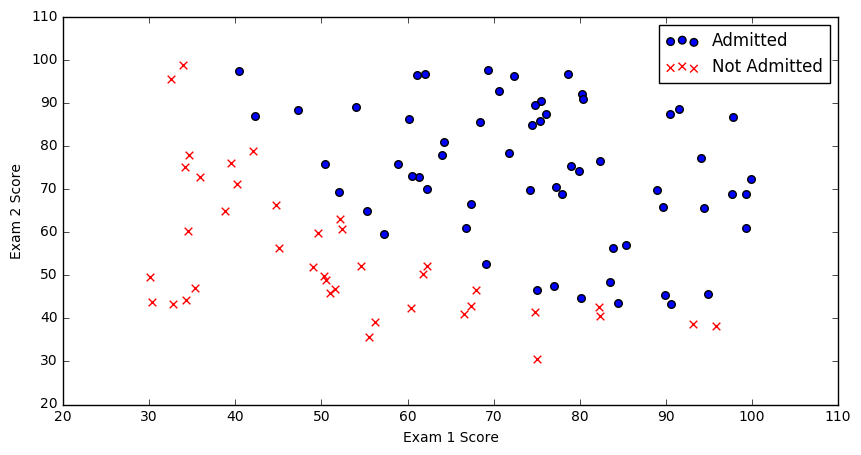

In [4]:
positive = pdData[pdData['Admitted'] == 1] # returns the subset of rows such Admitted = 1, i.e. the set of *positive* examples
negative = pdData[pdData['Admitted'] == 0] # returns the subset of rows such Admitted = 0, i.e. the set of *negative* examples

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=30, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=30, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

## The logistic regression

Objectif : Construire un classificateur (trouver les trois paramètres $ \theta_0, \theta_1, \theta_2 $)


Définir un seuil, en fonction du seuil déterminer les résultats d'admission

### Modules à compléter
-  `sigmoid` : Fonction de cartographie vers la probabilité

-  `model` : Renvoie la valeur de prédiction

-  `cost` : Calculer la perte en fonction des paramètres

-  `gradient` : Calculer la direction du gradient pour chaque paramètre

-  `descent` : Mettre à jour les paramètres

-  `accuracy`: Calculer la précision


###  `sigmoid` 函数

$$
g(z) = \frac{1}{1+e^{-z}}   
$$

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

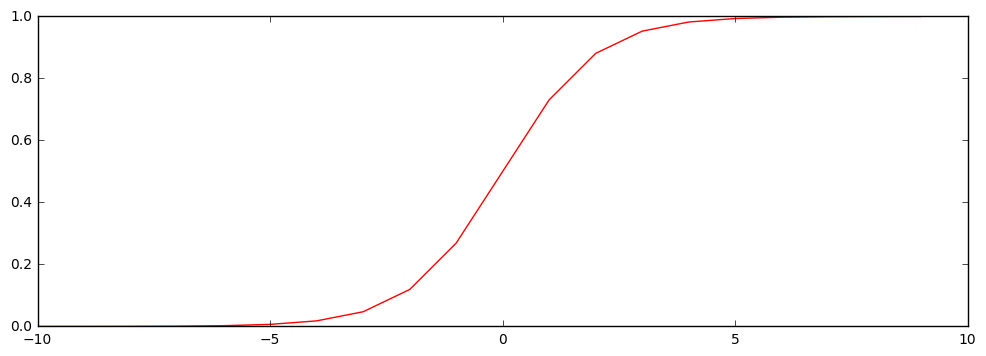

In [6]:
nums = np.arange(-10, 10, step=1) #creates a vector containing 20 equally spaced values from -10 to 10
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(nums, sigmoid(nums), 'r')

### Sigmoid
* $g:\mathbb{R} \to [0,1]$
* $g(0)=0.5$
* $g(- \infty)=0$
* $g(+ \infty)=1$

In [7]:
def model(X, theta):
    
    return sigmoid(np.dot(X, theta.T))

$$
\begin{array}{ccc}
\begin{pmatrix}\theta_{0} & \theta_{1} & \theta_{2}\end{pmatrix} & \times & \begin{pmatrix}1\\
x_{1}\\
x_{2}
\end{pmatrix}\end{array}=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}
$$

In [8]:

pdData.insert(0, 'Ones', 1) # in a try / except structure so as not to return an error if the block si executed several times


# set X (training data) and y (target variable)
orig_data = pdData.as_matrix() # convert the Pandas representation of the data to an array useful for further computations
cols = orig_data.shape[1]
X = orig_data[:,0:cols-1]
y = orig_data[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
#X = np.matrix(X.values)
#y = np.matrix(data.iloc[:,3:4].values) #np.array(y.values)
theta = np.zeros([1, 3])

In [10]:
X[:5]

array([[  1.        ,  34.62365962,  78.02469282],
       [  1.        ,  30.28671077,  43.89499752],
       [  1.        ,  35.84740877,  72.90219803],
       [  1.        ,  60.18259939,  86.3085521 ],
       [  1.        ,  79.03273605,  75.34437644]])

In [11]:
y[:5]

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.]])

In [12]:
theta

array([[ 0.,  0.,  0.]])

In [13]:
X.shape, y.shape, theta.shape

((100, 3), (100, 1), (1, 3))

### Fonction de perte
Prendre l'opposé de la fonction de vraisemblance logarithmique

$$
D(h_\theta(x), y) = -y\log(h_\theta(x)) - (1-y)\log(1-h_\theta(x))
$$
Calculer la perte moyenne
$$
J(\theta)=\frac{1}{n}\sum_{i=1}^{n} D(h_\theta(x_i), y_i)
$$

In [14]:
def cost(X, y, theta):
    left = np.multiply(-y, np.log(model(X, theta)))
    right = np.multiply(1 - y, np.log(1 - model(X, theta)))
    return np.sum(left - right) / (len(X))

In [15]:
cost(X, y, theta)

0.69314718055994529

### calcul du gradient


$$
\frac{\partial J}{\partial \theta_j}=-\frac{1}{m}\sum_{i=1}^n (y_i - h_\theta (x_i))x_{ij}
$$


In [23]:
def gradient(X, y, theta):
    grad = np.zeros(theta.shape)
    error = (model(X, theta)- y).ravel()
    for j in range(len(theta.ravel())): #for each parmeter
        term = np.multiply(error, X[:,j])
        grad[0, j] = np.sum(term) / len(X)
    
    return grad

### Gradient descent

Comparer 3 différentes méthodes de descente de gradient


In [16]:
STOP_ITER = 0
STOP_COST = 1
STOP_GRAD = 2

def stopCriterion(type, value, threshold):
    #设定三种不同的停止策略
    if type == STOP_ITER:        return value > threshold
    elif type == STOP_COST:      return abs(value[-1]-value[-2]) < threshold
    elif type == STOP_GRAD:      return np.linalg.norm(value) < threshold

In [17]:
import numpy.random
#洗牌
def shuffleData(data):
    np.random.shuffle(data)
    cols = data.shape[1]
    X = data[:, 0:cols-1]
    y = data[:, cols-1:]
    return X, y

In [18]:
import time

def descent(data, theta, batchSize, stopType, thresh, alpha):
    #梯度下降求解
    
    init_time = time.time()
    i = 0 # 迭代次数
    k = 0 # batch
    X, y = shuffleData(data)
    grad = np.zeros(theta.shape) # 计算的梯度
    costs = [cost(X, y, theta)] # 损失值

    
    while True:
        grad = gradient(X[k:k+batchSize], y[k:k+batchSize], theta)
        k += batchSize #取batch数量个数据
        if k >= n: 
            k = 0 
            X, y = shuffleData(data) #重新洗牌
        theta = theta - alpha*grad # 参数更新
        costs.append(cost(X, y, theta)) # 计算新的损失
        i += 1 

        if stopType == STOP_ITER:       value = i
        elif stopType == STOP_COST:     value = costs
        elif stopType == STOP_GRAD:     value = grad
        if stopCriterion(stopType, value, thresh): break
    
    return theta, i-1, costs, grad, time.time() - init_time

In [20]:
def runExpe(data, theta, batchSize, stopType, thresh, alpha):
    #import pdb; pdb.set_trace();
    theta, iter, costs, grad, dur = descent(data, theta, batchSize, stopType, thresh, alpha)
    name = "Original" if (data[:,1]>2).sum() > 1 else "Scaled"
    name += " data - learning rate: {} - ".format(alpha)
    if batchSize==n: strDescType = "Gradient"
    elif batchSize==1:  strDescType = "Stochastic"
    else: strDescType = "Mini-batch ({})".format(batchSize)
    name += strDescType + " descent - Stop: "
    if stopType == STOP_ITER: strStop = "{} iterations".format(thresh)
    elif stopType == STOP_COST: strStop = "costs change < {}".format(thresh)
    else: strStop = "gradient norm < {}".format(thresh)
    name += strStop
    print ("***{}\nTheta: {} - Iter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s".format(
        name, theta, iter, costs[-1], dur))
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper() + ' - Error vs. Iteration')
    return theta

### Différentes stratégies d'arrêt

#### Définir le nombre d'itérations

***Original data - learning rate: 1e-06 - Gradient descent - Stop: 5000 iterations
Theta: [[-0.00027127  0.00705232  0.00376711]] - Iter: 5000 - Last cost: 0.63 - Duration: 1.18s


array([[-0.00027127,  0.00705232,  0.00376711]])

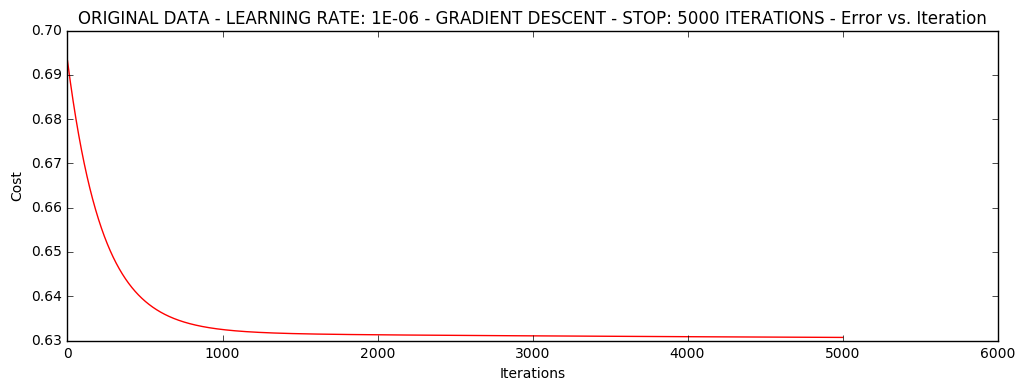

In [29]:
#选择的梯度下降方法是基于所有样本的
n=100
runExpe(orig_data, theta, n, STOP_ITER, thresh=5000, alpha=0.000001)

#### 根据损失值停止Arrêter en fonction de la valeur de perte

Définir un seuil de 1E-6, nécessite environ 110 000 itérations

***Original data - learning rate: 0.001 - Gradient descent - Stop: costs change < 1e-06
Theta: [[-5.13364014  0.04771429  0.04072397]] - Iter: 109901 - Last cost: 0.38 - Duration: 24.47s


array([[-5.13364014,  0.04771429,  0.04072397]])

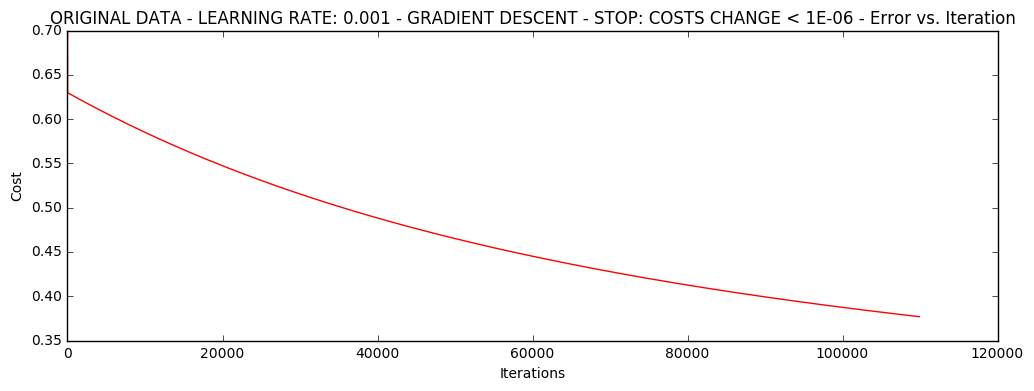

In [27]:
runExpe(orig_data, theta, n, STOP_COST, thresh=0.000001, alpha=0.001)

#### Arrêter en fonction du changement de gradient

Définir un seuil de 0,05, nécessite environ 40 000 itérations

***Original data - learning rate: 0.001 - Gradient descent - Stop: gradient norm < 0.05
Theta: [[-2.37033409  0.02721692  0.01899456]] - Iter: 40045 - Last cost: 0.49 - Duration: 10.79s


array([[-2.37033409,  0.02721692,  0.01899456]])

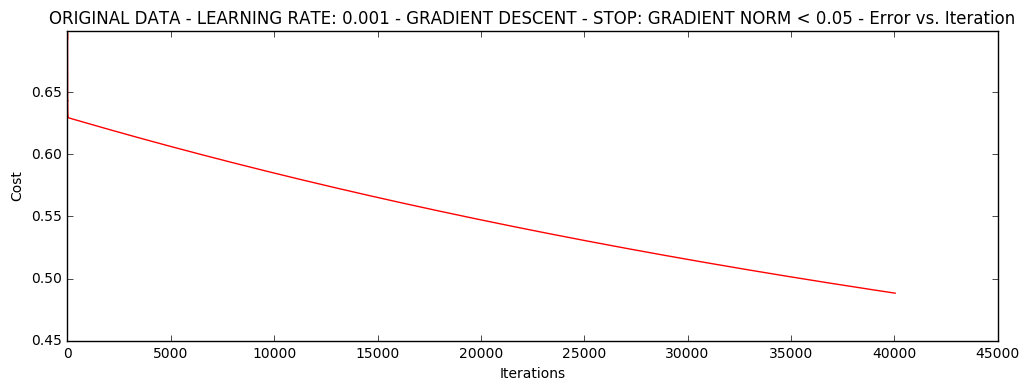

In [28]:
runExpe(orig_data, theta, n, STOP_GRAD, thresh=0.05, alpha=0.001)

### Comparer différentes méthodes de descente de gradient

#### Stochastic descent

***Original data - learning rate: 0.001 - Stochastic descent - Stop: 5000 iterations
Theta: [[-0.38504802  0.09357723 -0.01034717]] - Iter: 5000 - Last cost: 1.59 - Duration: 0.42s


array([[-0.38504802,  0.09357723, -0.01034717]])

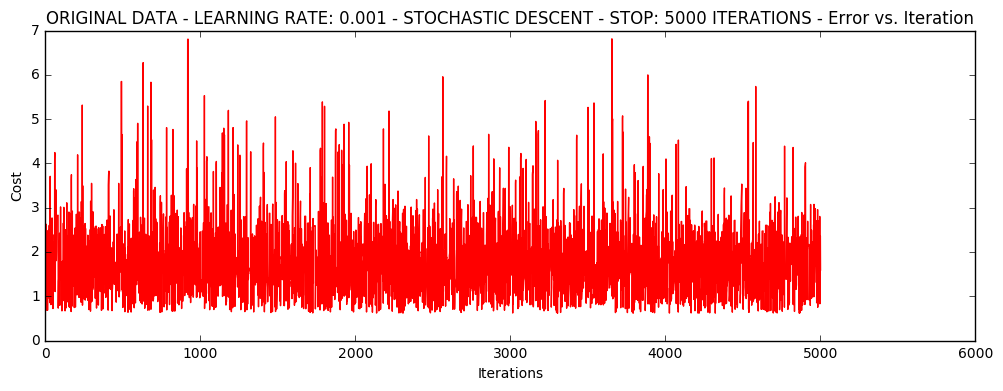

In [30]:
runExpe(orig_data, theta, 1, STOP_ITER, thresh=5000, alpha=0.001)

Un peu explosif... très instable, essayons de réduire légèrement le taux d'apprentissage

***Original data - learning rate: 2e-06 - Stochastic descent - Stop: 15000 iterations
Theta: [[-0.00202012  0.01009114  0.00103943]] - Iter: 15000 - Last cost: 0.63 - Duration: 1.10s


array([[-0.00202012,  0.01009114,  0.00103943]])

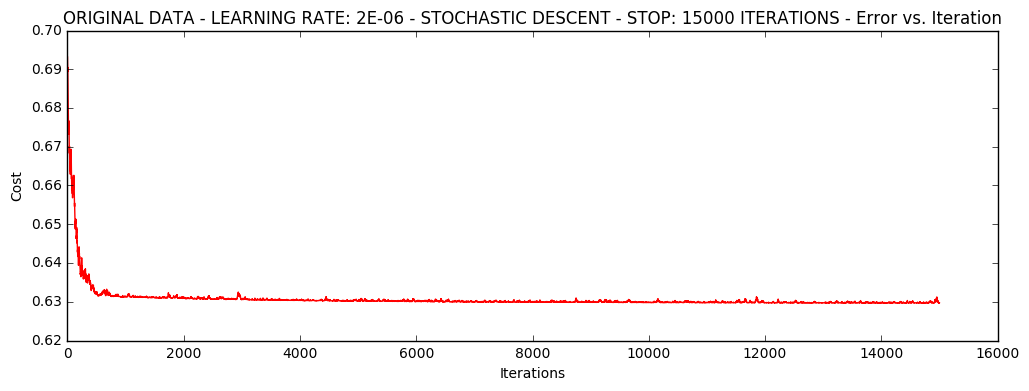

In [31]:
runExpe(orig_data, theta, 1, STOP_ITER, thresh=15000, alpha=0.000002)

Rapide, mais instable, nécessite un très faible taux d'apprentissage

#### Mini-batch descent

***Original data - learning rate: 0.001 - Mini-batch (16) descent - Stop: 15000 iterations
Theta: [[-1.0352224   0.01668297  0.0124234 ]] - Iter: 15000 - Last cost: 0.57 - Duration: 1.44s


array([[-1.0352224 ,  0.01668297,  0.0124234 ]])

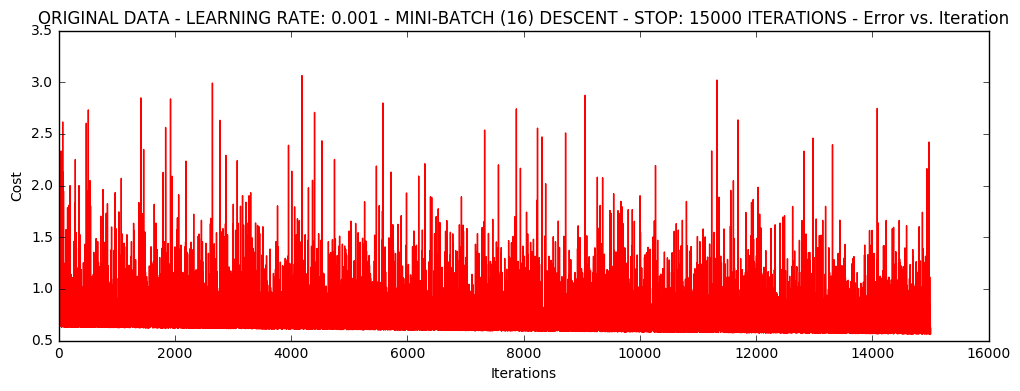

In [33]:
runExpe(orig_data, theta, 16, STOP_ITER, thresh=15000, alpha=0.001)

Les fluctuations sont encore assez importantes, essayons de normaliser les données
Normaliser les données en soustrayant la moyenne de chaque attribut (par colonne) et en divisant par leur écart-type. Le résultat final est que, pour chaque attribut/chaque colonne, toutes les données sont regroupées autour de 0 avec une variance de 1.

***Scaled data - learning rate: 0.001 - Gradient descent - Stop: 5000 iterations
Theta: [[ 0.3080807   0.86494967  0.77367651]] - Iter: 5000 - Last cost: 0.38 - Duration: 1.13s


array([[ 0.3080807 ,  0.86494967,  0.77367651]])

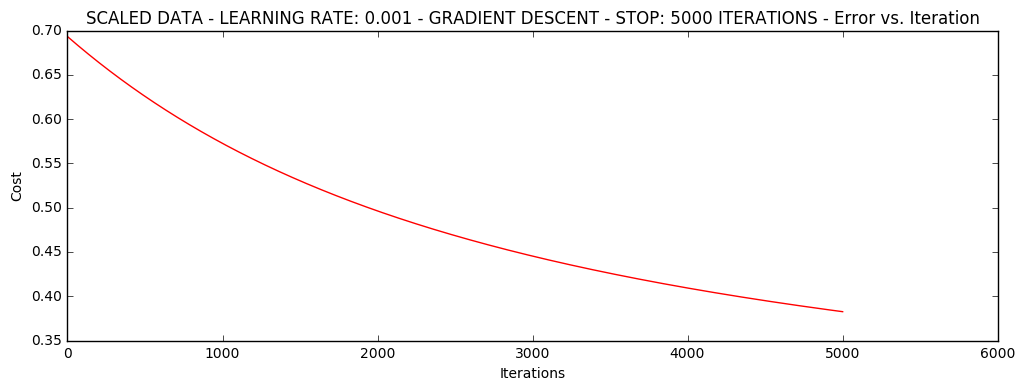

In [34]:
from sklearn import preprocessing as pp

scaled_data = orig_data.copy()
scaled_data[:, 1:3] = pp.scale(orig_data[:, 1:3])

runExpe(scaled_data, theta, n, STOP_ITER, thresh=5000, alpha=0.001)

C'est beaucoup mieux ! Avec les données d'origine, nous ne pouvions atteindre que 0,61, mais ici nous avons obtenu 0,38 ! Ainsi, prétraiter les données est très important.

***Scaled data - learning rate: 0.001 - Gradient descent - Stop: gradient norm < 0.02
Theta: [[ 1.071  2.63   2.411]] - Iter: 59422 - Last cost: 0.22 - Duration: 12.00s


array([[ 1.071,  2.63 ,  2.411]])

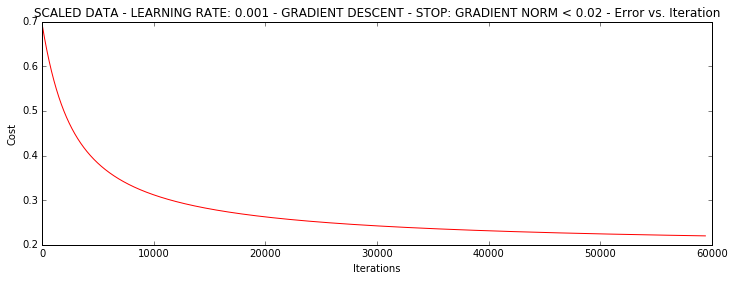

In [25]:
runExpe(scaled_data, theta, n, STOP_GRAD, thresh=0.02, alpha=0.001)

Plus d'itérations permettent de réduire davantage la perte !

***Scaled data - learning rate: 0.001 - Stochastic descent - Stop: gradient norm < 0.0004
Theta: [[ 1.14848169  2.79268789  2.5667383 ]] - Iter: 72637 - Last cost: 0.22 - Duration: 7.05s


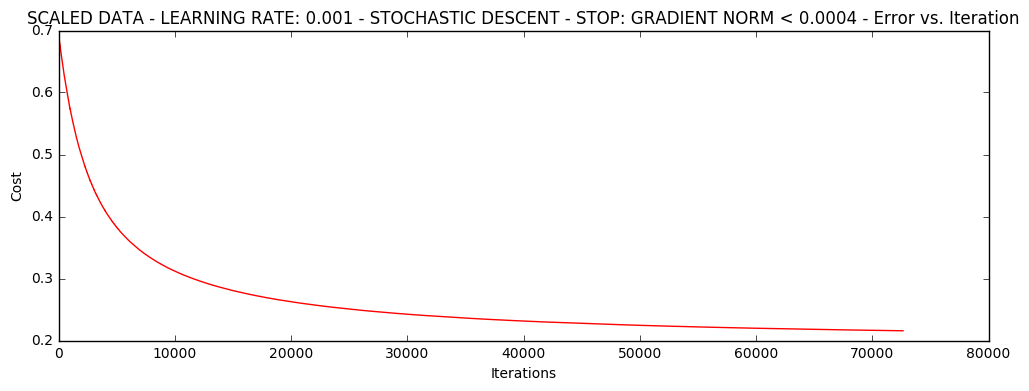

In [35]:
theta = runExpe(scaled_data, theta, 1, STOP_GRAD, thresh=0.002/5, alpha=0.001)

La descente de gradient stochastique est plus rapide, mais nous avons besoin de plus d'itérations, donc il est plus approprié d'utiliser la méthode par batch !!!

***Scaled data - learning rate: 0.001 - Mini-batch (16) descent - Stop: gradient norm < 0.004
Theta: [[ 1.17096801  2.83171736  2.61095087]] - Iter: 3940 - Last cost: 0.21 - Duration: 0.50s


array([[ 1.17096801,  2.83171736,  2.61095087]])

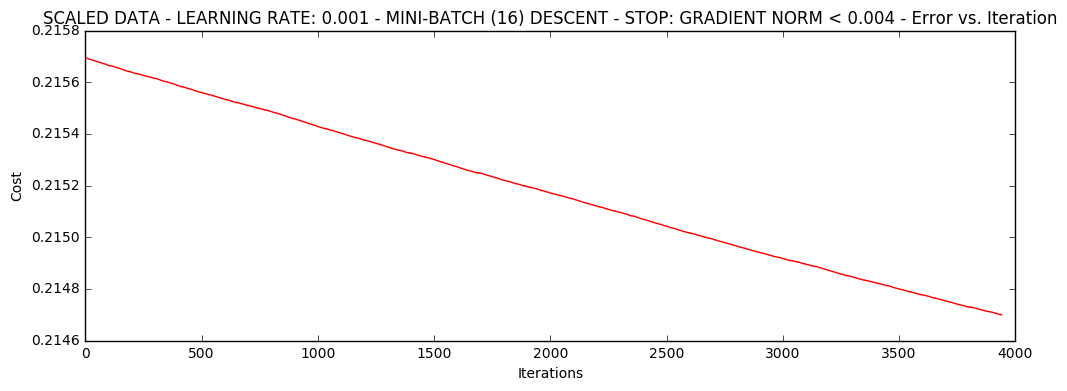

In [36]:
runExpe(scaled_data, theta, 16, STOP_GRAD, thresh=0.002*2, alpha=0.001)

## Précision

In [38]:
#设定阈值
def predict(X, theta):
    return [1 if x >= 0.5 else 0 for x in model(X, theta)]

In [40]:
scaled_X = scaled_data[:, :3]
y = scaled_data[:, 3]
predictions = predict(scaled_X, theta)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%
